### <center>Telecom Churn Case Study </center>
#### This program is going to analyze the high revenue customer churn based on the given data and suggest the outcome
###### Approach of this case study
  * Load the loan data 
  * Parse the data as needed
  * Clean the data by taking care of handling missing values,outliers
  * Drop the unwanted columns for easy analysis
  * Manipulate the datas needed like string to number, string to date
  * Format as needed to easy process and comparision
  * Perform analysis
  * Represent the findings in visauls 
  * Do PCA or perform regression models
  * Try out the supervised models and unsupervised 
  * Summarize the conclusion

In [1]:
## Add imports as needed by the program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
from sklearn.metrics import mean_squared_error
from math import sqrt

# Section 1 - Data Loading
- load the file with proper encoding
- List the columns and make and count of the rows

In [2]:
#Loading the file into dataframe
customerDF=pd.read_csv('telecom_churn_data.csv',engine='python')
print('Total Size (Row,Column)',customerDF.shape)  

Total Size (Row,Column) (99999, 226)


In [3]:
customerDF.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [4]:
pd.set_option('display.max_columns', None)
customerDF.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

## Column Analysis with Metadata

The below merging with meta data details out the type and descritption of each columns which helps to carry out the analysis further.

In [5]:
## Load meta data to find out more information about the columns
pd.set_option('display.max_rows', 50)
metadata = pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx') 
metadata.head(40)

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [6]:
customerDF.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
customerDF.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [8]:
# Find percentage of missing values 
pd.set_option('display.max_rows', None)
print("Missing values in % \n ",round(customerDF.isnull().sum()/len(customerDF.index), 2)*100)

Missing values in % 
  mobile_number                0.0
circle_id                    0.0
loc_og_t2o_mou               1.0
std_og_t2o_mou               1.0
loc_ic_t2o_mou               1.0
last_date_of_month_6         0.0
last_date_of_month_7         1.0
last_date_of_month_8         1.0
last_date_of_month_9         2.0
arpu_6                       0.0
arpu_7                       0.0
arpu_8                       0.0
arpu_9                       0.0
onnet_mou_6                  4.0
onnet_mou_7                  4.0
onnet_mou_8                  5.0
onnet_mou_9                  8.0
offnet_mou_6                 4.0
offnet_mou_7                 4.0
offnet_mou_8                 5.0
offnet_mou_9                 8.0
roam_ic_mou_6                4.0
roam_ic_mou_7                4.0
roam_ic_mou_8                5.0
roam_ic_mou_9                8.0
roam_og_mou_6                4.0
roam_og_mou_7                4.0
roam_og_mou_8                5.0
roam_og_mou_9                8.0
loc_og_t2t_mou_6    

In [9]:
# Check no of missing values in each column 
missingVals=customerDF.isnull().sum()
pd.set_option('display.max_rows', None)
missingVals[missingVals>0]

loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou_6             3937
loc_og_t2t_mou_7             3859
loc_og_t2t_mou_8             5378
loc_og_t2t_mou_9             7745
loc_og_t2m_mou_6             3937
loc_og_t2m_mou_7             3859
loc_og_t2m_mou_8             5378
loc_og_t2m_mou

In [10]:
#checking uniqueness of users with mobile_numbers
len(customerDF['mobile_number'].unique().tolist())

99999

# Section 2 -  Data clearing
 
 * Drop the columns with missing data
 * Handle Categorical columns
 * Handle missing vlaues with impute techniques

In [11]:
#dropping circle_id and other columns having more than 50% missing data
droping_dt_cols=['circle_id','last_date_of_month_6','last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9',
                 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9',
                 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
                'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9','arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9',
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'max_rech_data_6',
                 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
                 'total_rech_data_8', 'total_rech_data_9']

customerDF.drop(columns=droping_dt_cols,axis=1,inplace=True)

In [12]:
customerDF.head(10)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.40,0.00,101.20,3.58
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.00,0.00,0.0,4.68,23.43,12.76,0.00

In [13]:
# Check no of columns after first drop
customerDF.shape

(99999, 193)

In [14]:
customerDF.tail(10)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99989,7000964736,0.0,0.0,0.0,154.687,112.050,141.253,128.208,35.09,24.44,28.84,14.98,191.36,144.43,145.81,144.41,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,30.39,24.44,20.78,14.98,182.64,129.31,111.29,136.29,4.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,217.99,153.76,132.08,151.28,4.70,0.00,8.06,0.0,3.36,14.21,25.54,8.11,0.40,0.90,8.96,0.0,0.0,0.0,0.0,0.0,8.46,15.11,42.58,8.11,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,226.46,168.88,174.66,159.39,87.03,108.56,38.06,14.69,161.84,118.69,107.31,127.78,6.73,0.00,0.00,4.88,255.61,227.26,145.38,147.36,0.0,0.0,0.0,0.0,0.00,6.26,24.28,0.00,0.46,0.14,0.25,3.75,0.0,0.0,0.0,0.0,0.46,6.41,24.53,3.75,256.08,233.98,169.91,151.11,0.00,0.0,0.0,0.00,0.00,0.3,0.0,0.0,0.0,0.0,0.0,0.0,4,1,4,3,236,54,165,183,71,54,65,61,65,54,50,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,1461,0.00,0.00,0.00,0.0
99990,7002277044,0.0,0.0,0.0,35.793,126.941,0.000,123.219,0.00,0.98,0.00,6.86,15.73,59.64,0.00,127.26,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,6.86,0.26,0.51,0.00,9.64,0.16,0.48,0.00,0.00,5.79,6.68,0.00,14.78,0.43,0.99,0.00,16.51,0.00,0.98,0.00,0.0,9.49,50.

In [15]:
category_list = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9',
                 'fb_user_6', 'fb_user_7' , 'fb_user_8', 'fb_user_9']

customerDF[category_list] = customerDF[category_list].astype('object')
# Replacing NaN with "other" in categorical data
customerDF[category_list] = customerDF[category_list].replace(np.nan, "other")

In [16]:
customerDF.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,other,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,other,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40

In [17]:
missingVals=customerDF.isnull().sum()
pd.set_option('display.max_rows', None)
missingVals[missingVals>0]

loc_og_t2o_mou       1018
std_og_t2o_mou       1018
loc_ic_t2o_mou       1018
onnet_mou_6          3937
onnet_mou_7          3859
onnet_mou_8          5378
onnet_mou_9          7745
offnet_mou_6         3937
offnet_mou_7         3859
offnet_mou_8         5378
offnet_mou_9         7745
roam_ic_mou_6        3937
roam_ic_mou_7        3859
roam_ic_mou_8        5378
roam_ic_mou_9        7745
roam_og_mou_6        3937
roam_og_mou_7        3859
roam_og_mou_8        5378
roam_og_mou_9        7745
loc_og_t2t_mou_6     3937
loc_og_t2t_mou_7     3859
loc_og_t2t_mou_8     5378
loc_og_t2t_mou_9     7745
loc_og_t2m_mou_6     3937
loc_og_t2m_mou_7     3859
loc_og_t2m_mou_8     5378
loc_og_t2m_mou_9     7745
loc_og_t2f_mou_6     3937
loc_og_t2f_mou_7     3859
loc_og_t2f_mou_8     5378
loc_og_t2f_mou_9     7745
loc_og_t2c_mou_6     3937
loc_og_t2c_mou_7     3859
loc_og_t2c_mou_8     5378
loc_og_t2c_mou_9     7745
loc_og_mou_6         3937
loc_og_mou_7         3859
loc_og_mou_8         5378
loc_og_mou_9

In [18]:
# filling NaN values in continous data with 0.
customerDF = customerDF.replace(np.nan,0)

In [19]:
missingVals=customerDF.isnull().sum()
pd.set_option('display.max_rows', None)
missingVals[missingVals>0]

Series([], dtype: int64)

In [20]:
customerDF.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,other,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,1,other,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4

In [21]:
customerDF.tail(10)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99989,7000964736,0.0,0.0,0.0,154.687,112.050,141.253,128.208,35.09,24.44,28.84,14.98,191.36,144.43,145.81,144.41,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,30.39,24.44,20.78,14.98,182.64,129.31,111.29,136.29,4.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,217.99,153.76,132.08,151.28,4.70,0.00,8.06,0.0,3.36,14.21,25.54,8.11,0.40,0.90,8.96,0.0,0.0,0.0,0.0,0.0,8.46,15.11,42.58,8.11,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,226.46,168.88,174.66,159.39,87.03,108.56,38.06,14.69,161.84,118.69,107.31,127.78,6.73,0.00,0.00,4.88,255.61,227.26,145.38,147.36,0.0,0.0,0.0,0.0,0.00,6.26,24.28,0.00,0.46,0.14,0.25,3.75,0.0,0.0,0.0,0.0,0.46,6.41,24.53,3.75,256.08,233.98,169.91,151.11,0.00,0.0,0.0,0.00,0.00,0.3,0.0,0.0,0.0,0.0,0.0,0.0,4,1,4,3,236,54,165,183,71,54,65,61,65,54,50,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,other,other,other,other,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other,other,other,other,1461,0.00,0.00,0.00,0.0
99990,7002277044,0.0,0.0,0.0,35.793,126.941,0.000,123.219,0.00,0.98,0.00,6.86,15.73,59.64,0.00,127.26,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,6.86,0.26,0.51,0.00,9.64,0.16,0.48,0.00,0.00,5.79,6.68,0.00,14.78,0.43,0.99,0.00,16.51,0.00,0.98,0

### Handle categorcial values 

- Find categorical values
- Use dummies to flatten them
- Drop the actual cat columns
- Verify the converted columns

In [22]:
# subset all categorical variables
customerDF_categorical = customerDF.select_dtypes(include=['object'])
customerDF_categorical.head()

,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
0,0,0,0,other,1,1,1,other
1,other,0,0,other,other,1,1,other
2,other,other,other,0,other,other,other,1
3,other,other,other,other,other,other,other,other
4,0,other,other,other,0,other,other,other


In [23]:
# convert into dummies
customerDF_dummies = pd.get_dummies(customerDF_categorical, drop_first=True)
customerDF_dummies.head()

,night_pck_user_6_1.0,night_pck_user_6_other,night_pck_user_7_1.0,night_pck_user_7_other,night_pck_user_8_1.0,night_pck_user_8_other,night_pck_user_9_1.0,night_pck_user_9_other,fb_user_6_1.0,fb_user_6_other,fb_user_7_1.0,fb_user_7_other,fb_user_8_1.0,fb_user_8_other,fb_user_9_1.0,fb_user_9_other
0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1
1,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1
2,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0
3,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1


In [24]:
# drop categorical variables 
customerDF = customerDF.drop(list(customerDF_categorical.columns), axis=1)
# concat dummy variables with customerDF
customerDF= pd.concat([customerDF, customerDF_dummies], axis=1)
print('Shape is : ',customerDF.shape)
customerDF.head(10)

Shape is :  (99999, 201)


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_other,night_pck_user_7_1.0,night_pck_user_7_other,night_pck_user_8_1.0,night_pck_user_8_other,night_pck_user_9_1.0,night_pck_user_9_other,fb_user_6_1.0,fb_user_6_other,fb_user_7_1.0,fb_user_7_other,fb_user_8_1.0,fb_user_8_other,fb_user_9_1.0,fb_user_9_other
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.0

In [25]:
customerDF.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 201 columns):
mobile_number             int64
loc_og_t2o_mou            float64
std_og_t2o_mou            float64
loc_ic_t2o_mou            float64
arpu_6                    float64
arpu_7                    float64
arpu_8                    float64
arpu_9                    float64
onnet_mou_6               float64
onnet_mou_7               float64
onnet_mou_8               float64
onnet_mou_9               float64
offnet_mou_6              float64
offnet_mou_7              float64
offnet_mou_8              float64
offnet_mou_9              float64
roam_ic_mou_6             float64
roam_ic_mou_7             float64
roam_ic_mou_8             float64
roam_ic_mou_9             float64
roam_og_mou_6             float64
roam_og_mou_7             float64
roam_og_mou_8             float64
roam_og_mou_9             float64
loc_og_t2t_mou_6          float64
loc_og_t2t_mou_7          float64
loc_og_t

## Now you can see that you have all variables as numeric.

In [26]:
# Checking for Missing Values and Inputing Them
# Adding up the missing values (column-wise)
customerDF.isnull().sum() >0

mobile_number             False
loc_og_t2o_mou            False
std_og_t2o_mou            False
loc_ic_t2o_mou            False
arpu_6                    False
arpu_7                    False
arpu_8                    False
arpu_9                    False
onnet_mou_6               False
onnet_mou_7               False
onnet_mou_8               False
onnet_mou_9               False
offnet_mou_6              False
offnet_mou_7              False
offnet_mou_8              False
offnet_mou_9              False
roam_ic_mou_6             False
roam_ic_mou_7             False
roam_ic_mou_8             False
roam_ic_mou_9             False
roam_og_mou_6             False
roam_og_mou_7             False
roam_og_mou_8             False
roam_og_mou_9             False
loc_og_t2t_mou_6          False
loc_og_t2t_mou_7          False
loc_og_t2t_mou_8          False
loc_og_t2t_mou_9          False
loc_og_t2m_mou_6          False
loc_og_t2m_mou_7          False
loc_og_t2m_mou_8          False
loc_og_t

# Filtering the data based on the desired average 
 
 - get the average of 6th and 7th month 
 - verify the data out come
 - Fileter the data where amt>0.7avg
 

In [27]:
# Adding a new column avg_amt_6_7 in dataframe
customerDF['avg_amt_6_7'] = customerDF[['total_rech_amt_6', 'total_rech_amt_7']].mean(axis=1)
customerDF.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_other,night_pck_user_7_1.0,night_pck_user_7_other,night_pck_user_8_1.0,night_pck_user_8_other,night_pck_user_9_1.0,night_pck_user_9_other,fb_user_6_1.0,fb_user_6_other,fb_user_7_1.0,fb_user_7_other,fb_user_8_1.0,fb_user_8_other,fb_user_9_1.0,fb_user_9_other,avg_amt_6_7
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,307.0
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00

In [28]:
#customerDF.describe(percentiles=[.25, .5, .75, .90, .95, .99]))
customerDF.describe([.30, .5, .70, .90, .95, .99])

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_other,night_pck_user_7_1.0,night_pck_user_7_other,night_pck_user_8_1.0,night_pck_user_8_other,night_pck_user_9_1.0,night_pck_user_9_other,fb_user_6_1.0,fb_user_6_other,fb_user_7_1.0,fb_user_7_other,fb_user_8_1.0,fb_user_8_other,fb_user_9_1.0,fb_user_9_other,avg_amt_6_7
count,9.999900e+04,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.00000,99999.0,99999.0,99999.0,99999.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000

In [29]:
#checking 70th percentile value
percentile = customerDF.avg_amt_6_7.quantile(0.7) # 70th percentile
percentile

368.5

In [30]:
# Getting top values of avg_amt_6_7 which are greater than 70th percentile
customerDF_30perc = customerDF.loc[(customerDF.avg_amt_6_7 > percentile)].sort_values(('avg_amt_6_7'),ascending = False)
customerDF_30perc.shape

(29979, 202)

 ### High Revenue Customer Details
 The above section detailed out the total number of high value customers
 * Total high revenue customer is derived based on 70% average value fo 6th and 7th month customer revenues 
 * Total high revenue customers 29979 


In [31]:
customerDF_30perc.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_other,night_pck_user_7_1.0,night_pck_user_7_other,night_pck_user_8_1.0,night_pck_user_8_other,night_pck_user_9_1.0,night_pck_user_9_other,fb_user_6_1.0,fb_user_6_other,fb_user_7_1.0,fb_user_7_other,fb_user_8_1.0,fb_user_8_other,fb_user_9_1.0,fb_user_9_other,avg_amt_6_7
count,2.997900e+04,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29

In [32]:
customerDF_30perc.head(10)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_other,night_pck_user_7_1.0,night_pck_user_7_other,night_pck_user_8_1.0,night_pck_user_8_other,night_pck_user_9_1.0,night_pck_user_9_other,fb_user_6_1.0,fb_user_6_other,fb_user_7_1.0,fb_user_7_other,fb_user_8_1.0,fb_user_8_other,fb_user_9_1.0,fb_user_9_other,avg_amt_6_7
38610,7001150960,0.0,0.0,0.0,27731.088,35145.834,33543.624,38805.617,5.69,5.14,7.01,5.64,3231.81,3868.59,3625.43,4247.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.69,5.14,7.01,5.64,2.51,0.40,8.29,1.75,0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.00,8.21,5.54,15.31,7.81,0.00,0.00,0.00,0.00,0.00,0.18,0.00,0.68,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.18,0.00,0.68,3229.29,3868.01,3629.91,4244.53,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,3237.51,3873.74,3645.23,4253.03,6.93,13.73,14.76,19.74,4.56,2.78,10.81,9.91,0.00,0.00,1.43,0.00,11.49,16.51,27.01,29.66,2.28,0.00,0.00,0.00,0.00,0.00,5.06,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.28,0.00,5.06,0.00,551.04,525.71,596.03,798.41,0.13,0.06,0.00,0.06,536.99,504.01,556.74,767.63,0.13,5.11,7.19,1.05,29,17,19,13,35190,40335,45320,37235,3100,3100,3100,3100,3100,3100,35,3100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,460,0.00,0.00,0.00,0.00,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,37762.5
33019,7002226643

In [33]:
customerDF_30perc.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 38610 to 75498
Data columns (total 202 columns):
mobile_number             int64
loc_og_t2o_mou            float64
std_og_t2o_mou            float64
loc_ic_t2o_mou            float64
arpu_6                    float64
arpu_7                    float64
arpu_8                    float64
arpu_9                    float64
onnet_mou_6               float64
onnet_mou_7               float64
onnet_mou_8               float64
onnet_mou_9               float64
offnet_mou_6              float64
offnet_mou_7              float64
offnet_mou_8              float64
offnet_mou_9              float64
roam_ic_mou_6             float64
roam_ic_mou_7             float64
roam_ic_mou_8             float64
roam_ic_mou_9             float64
roam_og_mou_6             float64
roam_og_mou_7             float64
roam_og_mou_8             float64
roam_og_mou_9             float64
loc_og_t2t_mou_6          float64
loc_og_t2t_mou_7          float64
loc_

## Create churn column 

- define a condition that customer is churned as below
- 9th month - no activity  then that is a good indication that the customer churned already
        * calculate total call minutes of usage for incoming and outgoing
        * calculate data consumption 

In [34]:
#creating a churn column in dataframe having if customer is churned then churn = 1 otherwise 0
condition_one = (customerDF_30perc["total_og_mou_9"] == 0) & (customerDF_30perc["total_ic_mou_9"] == 0) & (customerDF_30perc["vol_2g_mb_9"] == 0) & (customerDF_30perc["vol_3g_mb_9"] == 0)
conditions = [condition_one]
choices = ["1"]
customerDF_30perc['churn'] = np.select(conditions, choices, default="0")

In [35]:
customerDF_30perc.head(10)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_other,night_pck_user_7_1.0,night_pck_user_7_other,night_pck_user_8_1.0,night_pck_user_8_other,night_pck_user_9_1.0,night_pck_user_9_other,fb_user_6_1.0,fb_user_6_other,fb_user_7_1.0,fb_user_7_other,fb_user_8_1.0,fb_user_8_other,fb_user_9_1.0,fb_user_9_other,avg_amt_6_7,churn
38610,7001150960,0.0,0.0,0.0,27731.088,35145.834,33543.624,38805.617,5.69,5.14,7.01,5.64,3231.81,3868.59,3625.43,4247.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.69,5.14,7.01,5.64,2.51,0.40,8.29,1.75,0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.00,8.21,5.54,15.31,7.81,0.00,0.00,0.00,0.00,0.00,0.18,0.00,0.68,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.18,0.00,0.68,3229.29,3868.01,3629.91,4244.53,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,3237.51,3873.74,3645.23,4253.03,6.93,13.73,14.76,19.74,4.56,2.78,10.81,9.91,0.00,0.00,1.43,0.00,11.49,16.51,27.01,29.66,2.28,0.00,0.00,0.00,0.00,0.00,5.06,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,2.28,0.00,5.06,0.00,551.04,525.71,596.03,798.41,0.13,0.06,0.00,0.06,536.99,504.01,556.74,767.63,0.13,5.11,7.19,1.05,29,17,19,13,35190,40335,45320,37235,3100,3100,3100,3100,3100,3100,35,3100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,460,0.00,0.00,0.00,0.00,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,37762.5,0
33019,70

In [36]:
customerDF_30perc.tail(10)

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_other,night_pck_user_7_1.0,night_pck_user_7_other,night_pck_user_8_1.0,night_pck_user_8_other,night_pck_user_9_1.0,night_pck_user_9_other,fb_user_6_1.0,fb_user_6_other,fb_user_7_1.0,fb_user_7_other,fb_user_8_1.0,fb_user_8_other,fb_user_9_1.0,fb_user_9_other,avg_amt_6_7,churn
8829,7000968902,0.0,0.0,0.0,378.675,260.523,134.134,334.057,14.41,10.43,9.06,27.93,121.01,125.09,108.74,71.71,0.00,26.23,5.50,34.88,0.00,22.46,4.46,55.46,14.41,8.63,4.43,7.21,78.49,72.68,78.71,13.14,2.19,0.51,1.18,0.69,0.00,0.00,0.00,0.0,95.11,81.83,84.33,21.06,0.00,0.00,1.13,0.00,32.83,15.78,15.86,20.88,7.48,11.08,12.01,2.23,0.0,0.0,0.0,0.0,40.31,26.86,29.01,23.11,0.00,0.0,0.0,0.0,0.00,4.66,0.00,0.00,0.00,0.00,0.0,0.0,135.43,113.36,113.34,44.18,23.39,29.88,21.34,15.09,135.28,61.56,150.78,64.43,46.89,32.24,21.33,27.36,205.58,123.69,193.46,106.89,0.00,0.38,0.00,0.00,10.48,12.26,22.44,5.99,0.00,0.00,0.00,2.94,0.0,0.0,0.0,0.0,10.48,12.64,22.44,8.94,216.06,136.34,216.83,115.84,0.00,0.0,0.0,0.00,0.00,0.00,0.45,0.00,0.0,0.00,0.46,0.00,5,7,7,11,341,397,211,363,274,110,144,152,0,110,144,152,1.0,0.0,0.0,7.0,0.0,0.0,0.0,2.0,54.66,0.00,0.00,232.73,0.00,0.00,0.00,293.72,1,0,0,0,0,0,0,7,0,0,0,0,0,0,0,2,3280,0.00,0.00,0.00,0.0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,369.0,0
9053,7000409413,0.0,0.0

### Finding churn rate

In [37]:
# Convert data type to category
customerDF_30perc.churn = customerDF_30perc.churn.astype("category")
print("Churn-Ratio:")
print(customerDF_30perc.churn.value_counts()*100/customerDF_30perc.shape[0])

Churn-Ratio:
0    91.363955
1     8.636045
Name: churn, dtype: float64


### Back up the filtered data 

In [38]:
## Back up the data frame
filetered_customers=customerDF_30perc
customerDF_30perc.shape

(29979, 203)

#### Drop 9th month data since we derived churn indicators and hence not needed anymore

In [39]:
#deleting all columns related to 9th month.
delete_9_cols = ['onnet_mou_9','offnet_mou_9','roam_ic_mou_9','roam_og_mou_9','loc_og_t2t_mou_9','loc_og_t2m_mou_9',
                 'loc_og_t2f_mou_9','loc_og_t2c_mou_9','loc_og_mou_9','std_og_t2t_mou_9','std_og_t2m_mou_9',
                 'std_og_t2f_mou_9','std_og_t2c_mou_9','std_og_mou_9','isd_og_mou_9','spl_og_mou_9',
                 'og_others_9','total_og_mou_9','loc_ic_t2t_mou_9','loc_ic_t2m_mou_9','loc_ic_t2f_mou_9','loc_ic_mou_9',
                'std_ic_t2t_mou_9','std_ic_t2m_mou_9','std_ic_t2f_mou_9','std_ic_t2o_mou_9','total_ic_mou_9','spl_ic_mou_9',
                'ic_others_9','total_rech_num_9','max_rech_amt_9','last_day_rch_amt_9','count_rech_2g_9','count_rech_3g_9',
                'vol_3g_mb_9','monthly_2g_9','sachet_2g_9','monthly_3g_9','sachet_3g_9',]
#customerDF_30perc1.drop(columns=delete_9_cols,axis=1,inplace=True)  -- 164
filetered_customers = filetered_customers.filter(regex='[^_9]$', axis=1) 
filetered_customers=filetered_customers.drop(columns=['fb_user_9_1.0','fb_user_9_other','night_pck_user_9_other','night_pck_user_9_1.0'],axis=1)
filetered_customers.shape

(29979, 155)

In [40]:
print('Shape : ',filetered_customers.shape)
filetered_customers.head()

Shape :  (29979, 155)


,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_other,night_pck_user_7_1.0,night_pck_user_7_other,night_pck_user_8_1.0,night_pck_user_8_other,fb_user_6_1.0,fb_user_6_other,fb_user_7_1.0,fb_user_7_other,fb_user_8_1.0,fb_user_8_other,avg_amt_6_7,churn
38610,7001150960,0.0,0.0,0.0,27731.088,35145.834,33543.624,5.69,5.14,7.01,3231.81,3868.59,3625.43,0.0,0.0,0.0,0.0,0.0,0.00,5.69,5.14,7.01,2.51,0.40,8.29,0.00,0.00,0.0,0.00,0.00,0.00,8.21,5.54,15.31,0.00,0.0,0.00,0.00,0.18,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.18,0.00,3229.29,3868.01,3629.91,0.00,0.00,0.00,0.0,0.0,0.0,3237.51,3873.74,3645.23,6.93,13.73,14.76,4.56,2.78,10.81,0.00,0.00,1.43,11.49,16.51,27.01,2.28,0.00,0.0,0.00,0.00,5.06,0.00,0.0,0.0,0.0,0.0,0.0,2.28,0.00,5.06,551.04,525.71,596.03,0.13,0.06,0.00,536.99,504.01,556.74,0.13,5.11,7.19,29,17,19,35190,40335,45320,3100,3100,3100,3100,3100,35,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,460,0.00,0.00,0.00,0.00,0,1,0,1,0,1,0,1,0,1,0,1,37762.5,0
33019,7002226643,0.0,0.0,0.0,10955.066,8609.460,13505.996,0.00,0.00,0.00,177.53,58.44,107.03,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,159.73,53.86,47.08,0.00,0.31,0.0,0.00,0.00,0.00,159.73,54.18,47.08,0.00,0.0,0.00,11.71,0.00,59.95,6.08,4.26,0.0,0.0,0.0,0.0,17.79,4.26,59.95,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,177.53,58.44,107.03,0.03,0.35,0.00,82.54,20.81,26.53,4.59,0.00,0.83,87.18,21.16,27.36,0.00,0.00,0.0,0.00,0.00,12.81,1.93,0.0,0.0,0.0,0.0,0.0,1.93,0.00,12.81,89.11,21.16,40.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9,9,6,18500,19000,14000,3000,3000,3000,0,0,3000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,2567,0.00,0.00,0.00,0.00,0,1,0,1,0,1,0,1,0,1,0,1,18750.0,0
51314,7000777972,0.0,0.0,0.0,15487.684,14624.089,16040.503,0.18,0.00,0.00,5905.14,5490.28,5836.76,0.0,0.0,1.0,0.0,0.0,139.98,0.18,0.00,0.00,0.00,0.00,0.00,0.60,0.00,0.0,1.83,0.00,7.85,0.78,0.00,0.00,0.00,0.0,0.00,2.05,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0

# Visualize data - Detect Outliers

#### Univariate analysis on the original data frame 

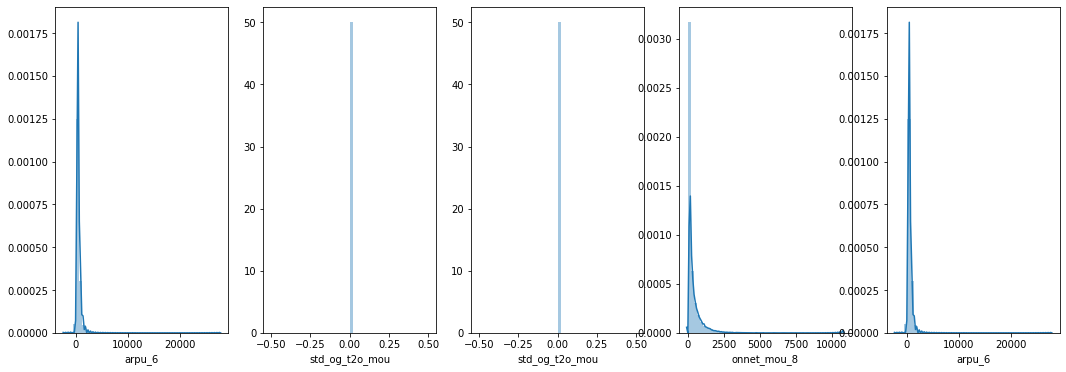

In [41]:
plt.figure(figsize=(18,6))
plt.subplot(1,5,1)
sns.distplot(customerDF_30perc.arpu_6)
#sns.boxplot(x='fuelsystem',y='price',data=carpriceDF)
plt.subplot(1,5,2)
sns.distplot(customerDF_30perc.std_og_t2o_mou)
plt.subplot(1,5,3)
sns.distplot(customerDF_30perc.std_og_t2o_mou)
plt.subplot(1,5,4)
sns.distplot(customerDF_30perc.onnet_mou_8)
plt.subplot(1,5,5)
sns.distplot(customerDF_30perc.arpu_6)

#### Bivariate EDA method

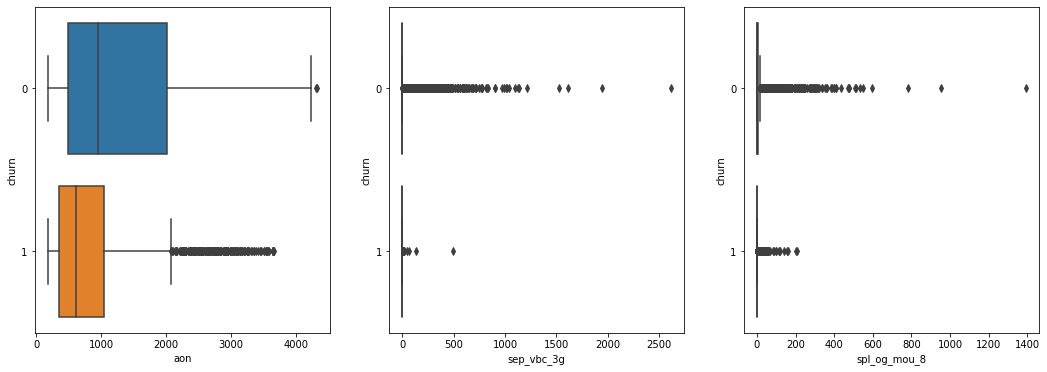

In [42]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(filetered_customers.aon, filetered_customers.churn)
plt.subplot(1,3,2)
sns.boxplot(filetered_customers.sep_vbc_3g, filetered_customers.churn)
plt.subplot(1,3,3)
sns.boxplot(filetered_customers.spl_og_mou_8, filetered_customers.churn)

The univariate and bivariate clearly indicates that we have outliers and that needs to be treated

In [43]:
# subset all categorical variables
continouus = filetered_customers.select_dtypes(include =['float64', 'int64'])
#categorical = customerDF_30perc.select_dtypes(include=['uint8'])
#Drop mobile number
mob_num = ['mobile_number']
continouus.drop(columns = mob_num, axis=1, inplace=True)
print('Continuous Shape :',continouus.shape)
continouus.describe()

Continuous Shape : (29979, 141)


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_amt_6_7
count,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000
mean,0.0,0.0,0.0,587.587624,589.424681,535.067748,296.23634,304.591922,267.809147,418.127743,424.103446,375.159926,17.428073,13.535270,13.263074,29.348362,22.056425

#### IQR technique to find out liers and analyze

In [44]:
## Identify outlier columns
Q1 = continouus.quantile(0.1)
Q3 = continouus.quantile(0.9)
IQR = Q3 - Q1
print(IQR)

loc_og_t2o_mou           0.0000
std_og_t2o_mou           0.0000
loc_ic_t2o_mou           0.0000
arpu_6                 723.6196
arpu_7                 721.5932
arpu_8                 851.3806
onnet_mou_6            785.0480
onnet_mou_7            815.4260
onnet_mou_8            721.2920
offnet_mou_6           863.9400
offnet_mou_7           882.1100
offnet_mou_8           834.8260
roam_ic_mou_6           32.7400
roam_ic_mou_7           18.3900
roam_ic_mou_8           18.6640
roam_og_mou_6           64.6040
roam_og_mou_7           41.2160
roam_og_mou_8           37.1500
loc_og_t2t_mou_6       207.2260
loc_og_t2t_mou_7       206.8420
loc_og_t2t_mou_8       196.9480
loc_og_t2m_mou_6       429.2040
loc_og_t2m_mou_7       430.3320
loc_og_t2m_mou_8       416.1520
loc_og_t2f_mou_6        18.3800
loc_og_t2f_mou_7        18.6600
loc_og_t2f_mou_8        16.9600
loc_og_t2c_mou_6         4.0400
loc_og_t2c_mou_7         4.8420
loc_og_t2c_mou_8         4.4500
loc_og_mou_6           650.8160
loc_og_m

In [45]:
outlierDF=pd.DataFrame({'ColumnName': continouus.columns,'IQRValue': IQR})
outlierDF=outlierDF.reset_index()
outlierDF=outlierDF.drop(columns=['index'],axis=1)
print('Outlier Shape:',outlierDF.shape)
#outlierDF=outlierDF[outlierDF.IQRValue>0]
print('Outlier Shape:',outlierDF.shape)
outlierDF.head(10)

Outlier Shape: (141, 2)
Outlier Shape: (141, 2)


,ColumnName,IQRValue
0,loc_og_t2o_mou,0.0000
1,std_og_t2o_mou,0.0000
2,loc_ic_t2o_mou,0.0000
3,arpu_6,723.6196
4,arpu_7,721.5932
5,arpu_8,851.3806
6,onnet_mou_6,785.0480
7,onnet_mou_7,815.4260
8,onnet_mou_8,721.2920
9,offnet_mou_6,863.9400


#### Outlier Treatment

In [46]:
filetered_customers.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_other,night_pck_user_7_1.0,night_pck_user_7_other,night_pck_user_8_1.0,night_pck_user_8_other,fb_user_6_1.0,fb_user_6_other,fb_user_7_1.0,fb_user_7_other,fb_user_8_1.0,fb_user_8_other,avg_amt_6_7
count,2.997900e+04,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.00000,29979.00000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.

In [47]:
def handle_outliers(ar, k=3):
    upper_limit = ar.mean() + k*ar.std()
    lower_limit = ar.mean() - k*ar.std()
    ar[ar<lower_limit] = lower_limit
    ar[ar>upper_limit] = upper_limit
    return ar
# cap outliers in the numeric columns
filetered_customers[outlierDF.ColumnName] = filetered_customers[outlierDF.ColumnName].apply(handle_outliers, axis=0)
print('Outliers are removed')
#filetered_customers[['arpu_6','sep_vbc_3g']] = filetered_customers[['arpu_6','sep_vbc_3g']].apply(cap_outliers, axis=0)

Outliers are removed


In [48]:
filetered_customers.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_1.0,night_pck_user_6_other,night_pck_user_7_1.0,night_pck_user_7_other,night_pck_user_8_1.0,night_pck_user_8_other,fb_user_6_1.0,fb_user_6_other,fb_user_7_1.0,fb_user_7_other,fb_user_8_1.0,fb_user_8_other,avg_amt_6_7
count,2.997900e+04,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.0,29979.0,29979.0,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,29979.000000,2

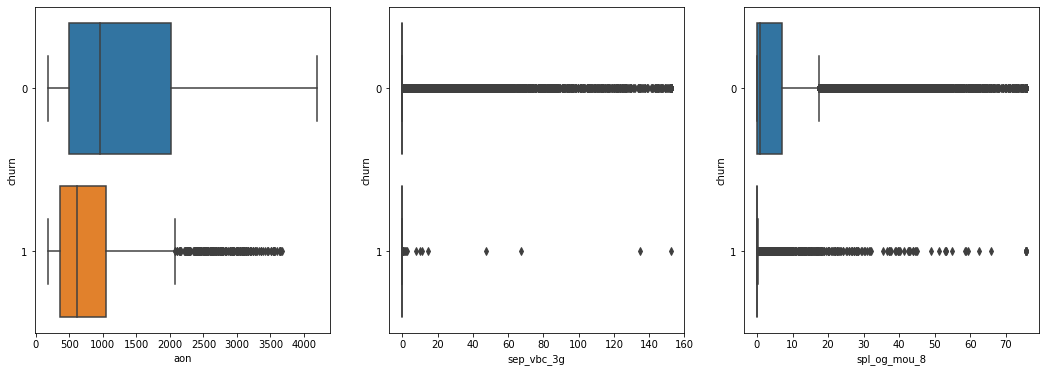

In [49]:
## Verify outliers with box plot
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
sns.boxplot(filetered_customers.aon, filetered_customers.churn)
plt.subplot(1,3,2)
sns.boxplot(filetered_customers.sep_vbc_3g, filetered_customers.churn)
plt.subplot(1,3,3)
sns.boxplot(filetered_customers.spl_og_mou_8, filetered_customers.churn)

# MODEL BUILDING 

* Superwised 
* Unsuperwised

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
# convert churn to numeric
filetered_customers['churn'] = pd.to_numeric(filetered_customers['churn'])
filetered_customers['churn']

38610    0
33019    0
51314    0
67717    0
98208    0
69968    0
61944    1
78970    1
10484    0
80414    0
22370    1
48388    0
57752    0
93779    0
97850    1
35774    0
19999    0
34226    0
68170    0
66157    0
17790    0
27531    0
3850     1
5349     0
49093    0
9989     0
28684    0
4520     0
3105     0
56035    0
33150    0
63364    0
70377    0
33035    0
588      0
60245    0
76337    0
99595    0
57069    0
87578    1
14825    0
95424    0
7571     0
55682    0
59526    1
29943    0
64139    0
14171    0
42964    0
82296    0
241      0
74987    1
92413    0
26100    1
22601    0
46614    0
62234    0
97509    0
46998    0
27082    1
67127    0
76054    0
51323    0
31038    0
88310    1
75192    0
39316    0
77146    0
11171    1
69604    1
30382    0
844      1
81224    0
1361     0
93797    0
66966    0
66924    0
70026    0
90778    0
20795    0
86306    0
2987     0
38816    0
22394    0
79455    0
98159    0
95760    0
60681    0
51322    0
55040    1
84324    0

### Split Train and Test 

In [52]:
# divide data into train and test
X = filetered_customers.drop("churn", axis = 1)
y = filetered_customers.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20985, 154)
(20985,)
(8994, 154)
(8994,)


In [53]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state = 2) 
X_train, y_train = smote.fit_sample(X_train, y_train) 

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
pca.fit(X_Train)

PCA(random_state=42)

In [55]:
pca.components_

array([[ 2.69937779e-02,  1.11022302e-16,  1.11022302e-16, ...,
         1.37267451e-01, -1.13940256e-01,  8.48104501e-02],
       [ 4.62696677e-03, -1.38777878e-16, -1.02348685e-16, ...,
        -1.15086828e-01,  1.06732006e-01,  1.03388084e-01],
       [-2.98143589e-02,  1.11022302e-16,  1.38777878e-16, ...,
         9.72867116e-02, -1.13214932e-01,  1.39811921e-01],
       ...,
       [-0.00000000e+00,  2.82445734e-02,  1.58159358e-01, ...,
        -4.16333634e-17, -5.49652562e-02, -3.76434994e-16],
       [-0.00000000e+00,  3.60693782e-02,  1.56232898e-01, ...,
        -2.08166817e-17,  1.51227481e-01,  2.53269627e-16],
       [ 0.00000000e+00, -1.25069179e-01, -8.19711879e-01, ...,
        -6.93889390e-17, -1.97528795e-03, -4.26741975e-16]])

In [56]:
pca.explained_variance_ratio_
# Calculate the explainded variance of PCA components
var_cumu = np.cumsum(pca.explained_variance_ratio_)
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))
print(' Almost 60 components explain 90% variance')

0       11.97
1       20.35
2       26.88
3       31.49
4       35.38
5       39.00
6       42.06
7       44.88
8       47.29
9       49.57
10      51.65
11      53.49
12      55.22
13      56.91
14      58.42
15      59.84
16      61.24
17      62.61
18      63.97
19      65.19
20      66.27
21      67.28
22      68.26
23      69.21
24      70.14
25      71.06
26      71.97
27      72.85
28      73.72
29      74.54
30      75.34
31      76.07
32      76.80
33      77.51
34      78.20
35      78.87
36      79.53
37      80.17
38      80.79
39      81.39
40      81.98
41      82.54
42      83.08
43      83.62
44      84.14
45      84.64
46      85.14
47      85.62
48      86.09
49      86.55
50      86.99
51      87.42
52      87.84
53      88.25
54      88.65
55      89.04
56      89.41
57      89.77
58      90.12
59      90.47
60      90.82
61      91.16
62      91.48
63      91.79
64      92.10
65      92.40
66      92.69
67      92.97
68      93.24
69      93.50
70      93.76
71    

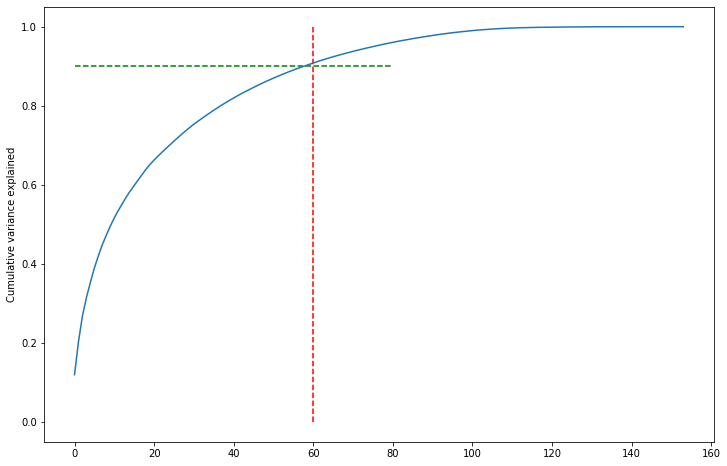

The plot shows that around 60 variables well explains more than 90% of variance


In [57]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.9, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()
print('The plot shows that around 60 variables well explains more than 90% of variance')

### PCA - Logistic Regression

In [58]:
# create pipeline with 60 varaibles
no_Var = 60
pipeline = Pipeline([('scaler', StandardScaler()),("pca", PCA(n_components=no_Var)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ])
# fit model
pipeline.fit(X_train, y_train)
# check score on train data
pipeline.score(X_train, y_train)

0.8877588275178636

#### Evaluation phase

* Use the model to test the test data

In [59]:
# Churn Prediction on the test set
y_pred = pipeline.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Calculate and verify sensitivity and specificity with binary average
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity:", round(sensitivity, 2), "\n", "Specificity:", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC value:", round(roc_auc_score(y_test, y_pred_prob),2))

[[7200 1017]
 [ 203  574]]
Sensitivity:0.74
Specificity:0.88
AUC value: 0.88


#### Try with incremental PCA

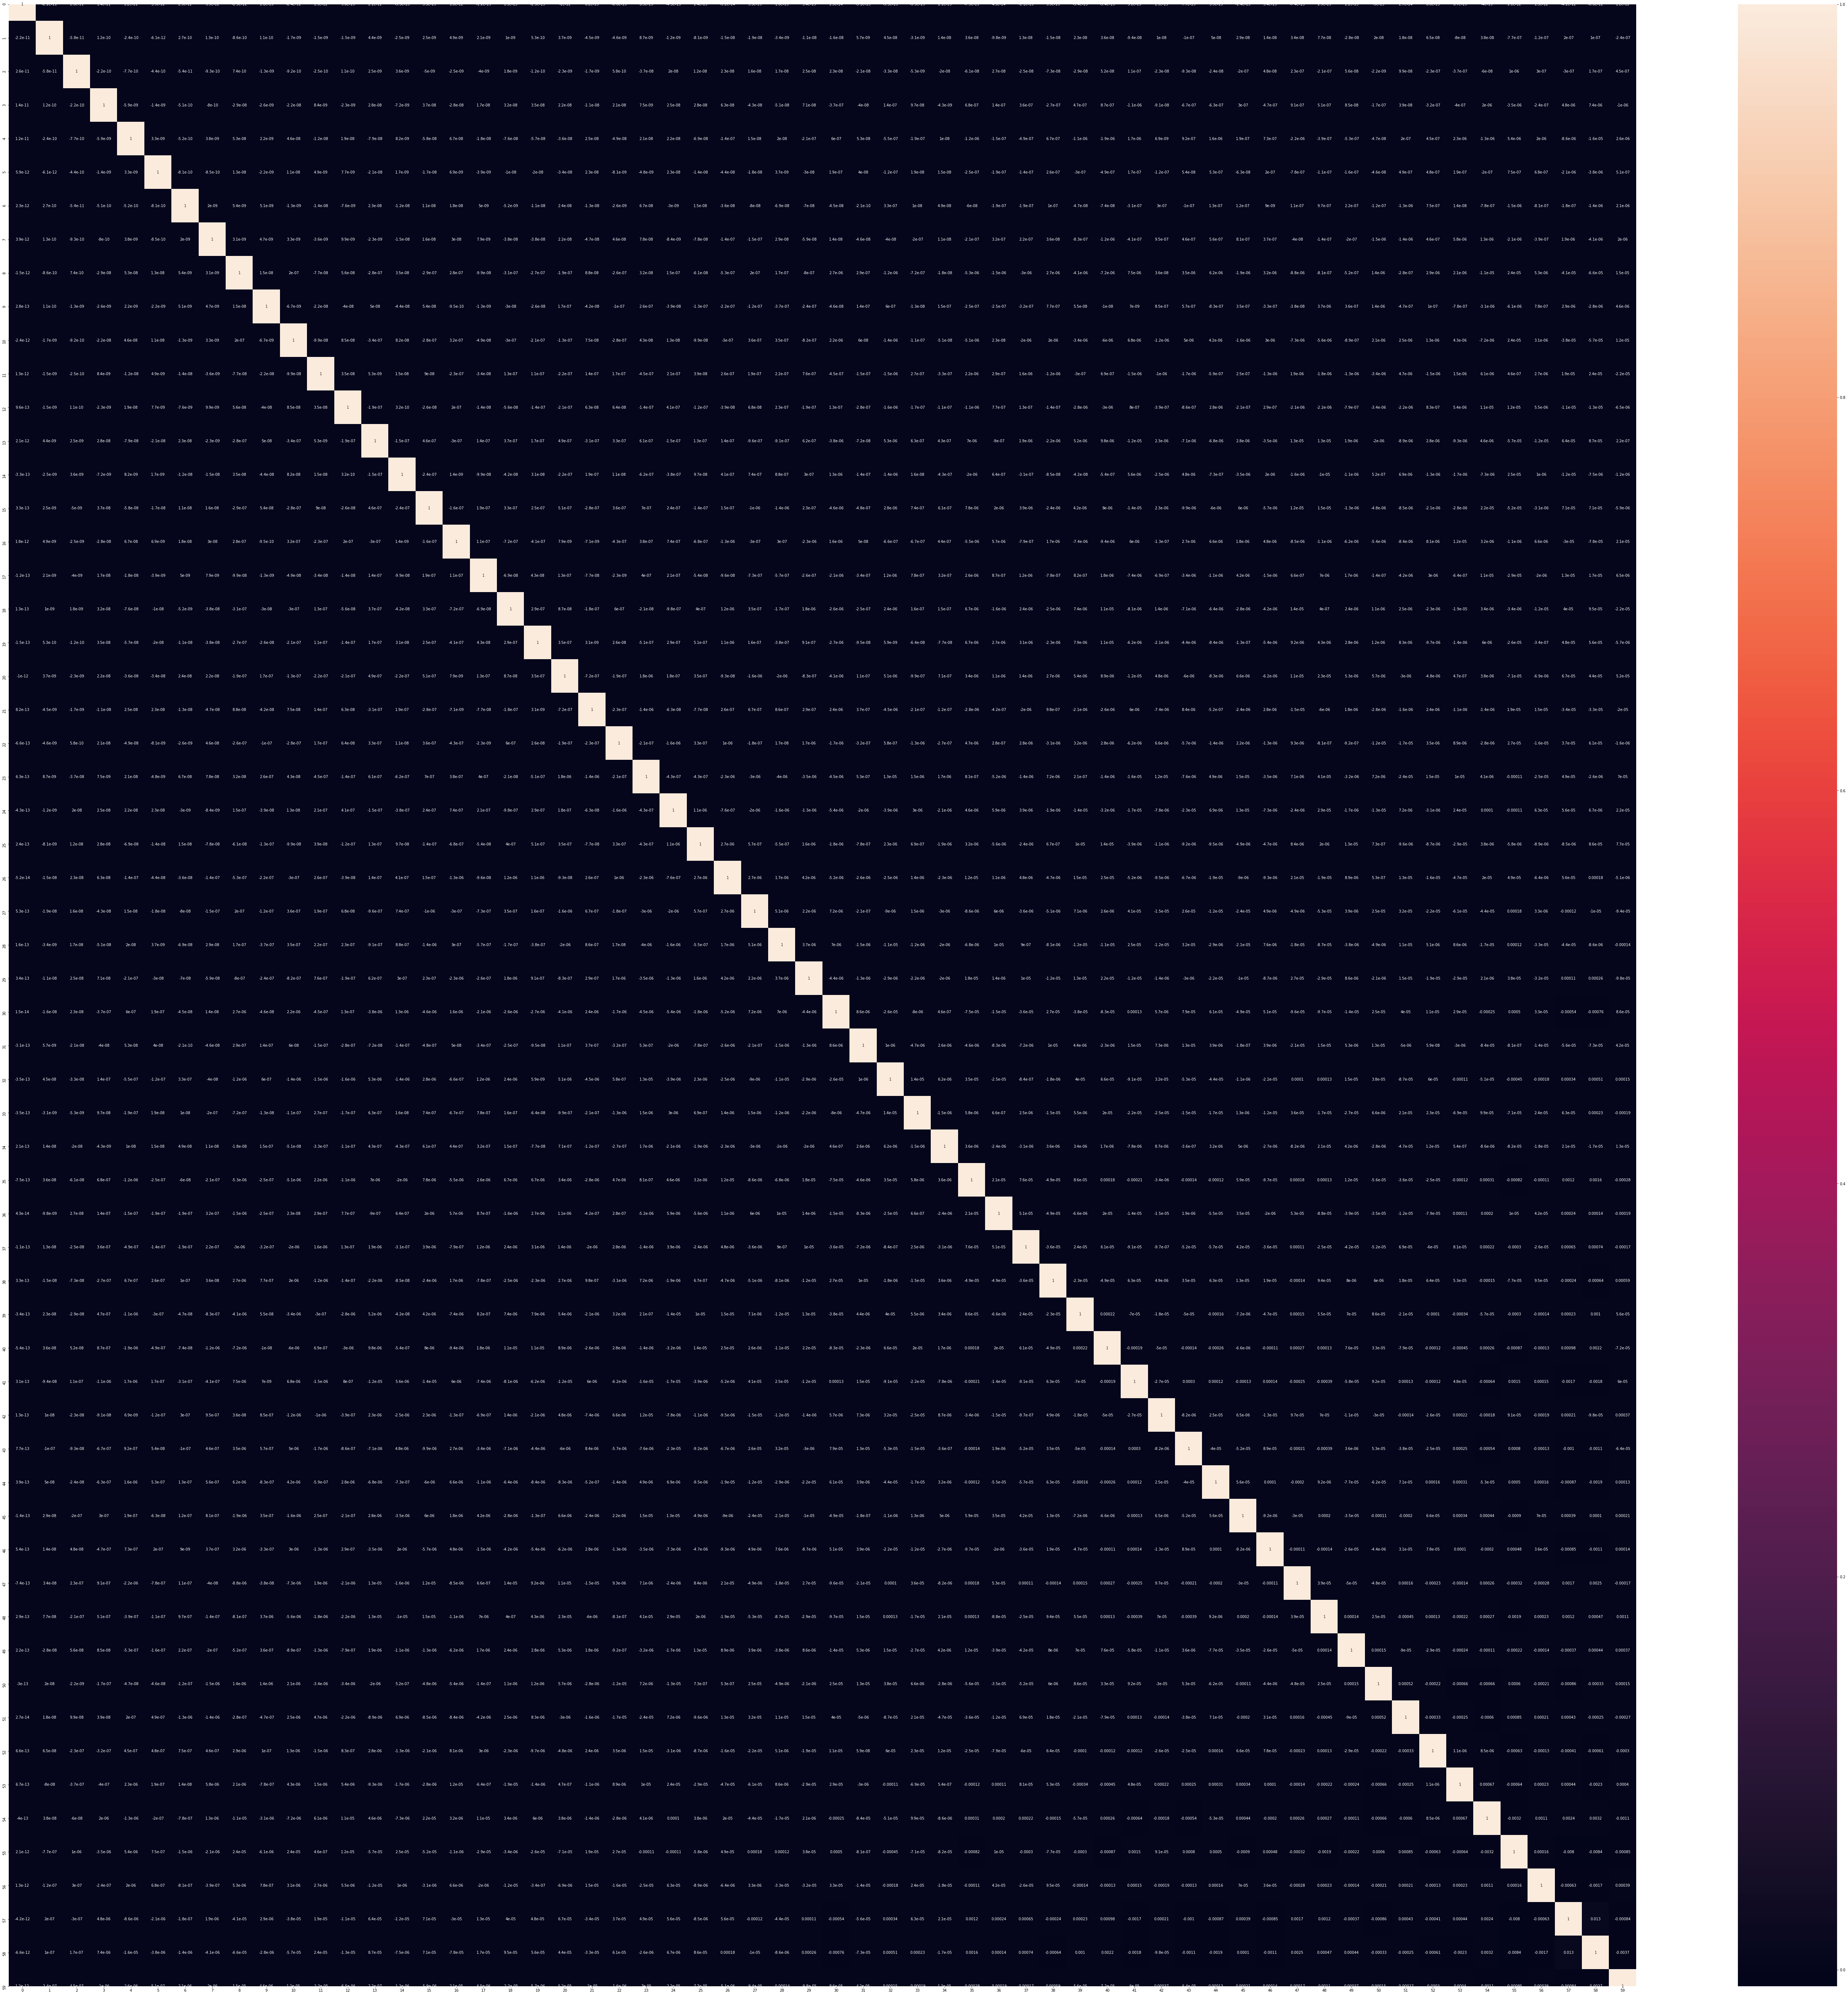

In [60]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=no_Var)
df_train_pca = pca_final.fit_transform(X_train)
corrmat = np.corrcoef(df_train_pca.transpose())
plt.figure(figsize=[100,100])
sns.heatmap(corrmat, annot=True)

#### Applying logistic regression on the data on our Principal components

In [61]:
# calculate imbalance to set the levels
y_train.value_counts()/y_train.shape

1    0.5
0    0.5
Name: churn, dtype: float64

In [62]:
#  use the calculated weights in LR
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", PCA()),
         ("logistic", logistic)
        ]

pca_logistic = Pipeline(steps)
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create GridSearch object
pca_lr_model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [63]:
### Model fit might take little bit time (around 2 mins)
pca_lr_model.fit(X_train, y_train)
print('PCA LR model fit is done')

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.3min finished


PCA LR model fit is done


In [64]:
print("Best AUC: ", pca_lr_model.best_score_)
print("Best hyperparameters: ", pca_lr_model.best_params_)

Best AUC:  0.9468328126545542
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [65]:
# predict churn on test data
y_pred = pca_lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n',cm)
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pca_lr_model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

print('Parameters are almost same for both the cases')

Confusion matrix:
 [[4654 3563]
 [  54  723]]
Sensitivity: 	0.93
Specificity: 	0.57
AUC:    	 0.88
Parameters are almost same for both the cases


#### Random Forest

In [66]:
# Running the random forest with default parameters.
#randomForest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)
#randomForest = RandomForestClassifier(n_estimators=100, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

randomForest = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

# hyperparameter space
params = {"criterion": ['gini'], "max_features": ['auto', 0.4]}
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)
# create gridsearch object
gridsearchModel = GridSearchCV(estimator=randomForest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)
print('Random Forest try')

# Create the parameter grid based on the results of random search 

Random Forest try


In [67]:
#   fit gridsearchModel model  (The compilation time is around 5 min)
gridsearchModel.fit(X_train, y_train)
print('Random Forest fit is complete')

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.2min finished


Random Forest fit is complete


In [68]:
y_pred = gridsearchModel.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confustion Matrix:\n',cm)
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", round(sensitivity, 2), "\n", "Specificity: ", round(specificity, 2), sep='')
# check area under curve
y_pred_prob = gridsearchModel.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Confustion Matrix:
 [[7464  753]
 [ 202  575]]
Sensitivity: 0.74
Specificity: 0.91
AUC:    	 0.91


 ****  Sensitivity is better in logistic model compared random forest

## Superwise Model 

In [69]:
# Putting feature variable to X_sup
X_sup = filetered_customers.drop(['churn','mobile_number'], axis=1)
filetered_customers.shape
# Putting response variable to y_sup
y_sup = filetered_customers['churn']
# Splitting the data into train and test
X_sup_train, X_sup_test, y_sup_train, y_sup_test = train_test_split(X_sup, y_sup, train_size=0.7, test_size=0.3, random_state=100)

In [70]:
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm
smote = SMOTE(random_state=27)
X_sup_train, y_sup_train = smote.fit_sample(X_sup_train, y_sup_train)
os_data_X = pd.DataFrame(data=X_sup_train)
os_data_y= pd.DataFrame(data=y_sup_train)
# Logistic regression model
logm1 = sm.GLM(os_data_y.astype(float),(sm.add_constant(os_data_X.astype(float))),family = sm.families.Binomial())
logm1.fit().summary()
# running RFE with 13 variables as output

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38342
Model:                            GLM   Df Residuals:                    38200
Model Family:                Binomial   Df Model:                          141
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11937.
Date:                Mon, 18 May 2020   Deviance:                       23874.
Time:                        14:05:09   Pearson chi2:                 2.87e+05
No. Iterations:                    44                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      5.8287      0.130     44.765      0.000       5.573       6.084
loc_og_t2o_mou         -6.313e-13      8e-14     -7.889      0.000   -7.88e-13   -4.74e-13
std_og_t2o_mou         -9.648e-13   8.13e-14    -11.864      0.000   -1.12e-12   -8.05e-13
loc_ic_t2o_mou         -2.833e-13   8.67e-14     -3.266      0.001   -4.53e-13   -1.13e-13
arpu_6                     0.0003      0.000      1.539      0.124   -8.13e-05       0.001
arpu_7                     0.0007      0.000      3.386      0.001       0.000       0.001
arpu_8                     0.0012      0.000      5.755      0.000       0.001       0.002
onnet_mou_6                0.0008      0.000      2.086      0.037    4.82e-05       0.002
onnet_mou_7                0.0009      0.000      2.196      0.028       0.000       0.002
onnet_mou_8               -0.0006      0.000     -1.202      0.229      -0.002       0.000
offnet_mou_6               0.0001      0.000      0.430      0.668      -0.001       0.001
offnet_mou_7               0.0020      0.000      5.180      0.000       0.001       0.003
offnet_mou_8              -0.0028      0.000     -7.275      0.000      -0.003      -0.002
roam_ic_mou_6              0.0012      0.001      1.510      0.131      -0.000       0.003
roam_ic_mou_7              0.0033      0.001      3.639      0.000       0.002       0.005
roam_ic_mou_8             -0.0026      0.001     -2.980      0.003      -0.004      -0.001
roam_og_mou_6             -0.0020      0.001     -3.485      0.000      -0.003      -0.001
roam_og_mou_7             -0.0023      0.001     -3.271      0.001      -0.004      -0.001
roam_og_mou_8              0.0051      0.001      7.763      0.000       0.004       0.006
loc_og_t2t_mou_6          -0.0004      0.001     -0.475      0.635      -0.002       0.001
loc_og_t2t_mou_7          -0.0011      0.001     -1.004      0.316      -0.003       0.001
loc_og_t2t_mou_8          -0.0059      0.001     -4.146      0.000      -0.009      -0.003
loc_og_t2m_mou_6          -0.0015      0.001     -2.182      0.029      -0.003      -0.000
loc_og_t2m_mou_7          -0.0024      0.001     -2.562      0.010      -0.004      -0.001
loc_og_t2m_mou_8          -0.0019      0.001     -1.452      0.146      -0.004       0.001
loc_og_t2f_mou_6           0.0052      0.003      1.826      0.068      -0.000       0.011
loc_og_t2f_mou_7          -0.0118      0.003     -3.514      0.000      -0.018      -0.005
loc_og_t2f_mou_8          -0.0030      0.004     -0.783      0.434      -0.010       0.004
loc_og_t2c_mou_6          -0.0217      0.006     -3.574      0.000      -0.034      -0.010
loc_og_t2c_mou_7           0.0102      0.006      1.843      0.065      -0.001       0.021
loc_og_t2c_mou_8           0.0291      0.007      4.455      0.000       0.016  

In [71]:
## this will take minimum of 4 min
# Logistic regression model
logreg = LogisticRegression()
rfe = RFE(logreg, 13)  
rfe = rfe.fit(os_data_X,os_data_y)

In [72]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [73]:
list(zip(os_data_X.columns, rfe.support_, rfe.ranking_))
col = os_data_X.columns[rfe.support_]
os_data_X.columns[~rfe.support_]
#Assessing the model with StatsModels
X_train_sm = sm.add_constant(os_data_X[col])
logm2 = sm.GLM(y_sup_train.astype(float),X_sup_train.astype(float), family = sm.families.Binomial())
logm2 = sm.GLM(os_data_y.astype(float),X_train_sm.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38342
Model:                            GLM   Df Residuals:                    38328
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16499.
Date:                Mon, 18 May 2020   Deviance:                       32997.
Time:                        14:07:01   Pearson chi2:                 1.80e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2208      0.029     41.856      0.000       1.164       1.278
loc_og_t2c_mou_8     0.0316      0.005      6.121      0.000       0.021       0.042
std_og_t2f_mou_8    -0.0480      0.005     -9.995      0.000      -0.057      -0.039
isd_og_mou_6         0.0100      0.001      7.642      0.000       0.007       0.013
spl_og_mou_8        -0.0156      0.002     -8.361      0.000      -0.019      -0.012
loc_ic_t2m_mou_8    -0.0100      0.000    -46.333      0.000      -0.010      -0.010
loc_ic_t2f_mou_8    -0.0207      0.001    -15.154      0.000      -0.023      -0.018
std_ic_t2t_mou_8    -0.0108      0.001    -14.109      0.000      -0.012      -0.009
std_ic_t2f_mou_7     0.0180      0.002      7.545      0.000       0.013       0.023
total_rech_num_6     0.0626      0.002     30.034      0.000       0.059       0.067
total_rech_num_8    -0.1019      0.003    -39.569      0.000      -0.107      -0.097
count_rech_2g_8      0.0781      0.016      4.888      0.000       0.047       0.109
sep_vbc_3g          -0.0274      0.003    -10.034      0.000      -0.033      -0.022
fb_user_8_1.0       -2.1219      0.050    -42.488      0.000      -2.220      -2.024
====================================================================================
"""

In [74]:
X_train_sm = sm.add_constant(os_data_X[col])
#logm2 = sm.GLM(y_sup_train.astype(float),X_sup_train.astype(float), family = sm.families.Binomial())
logm2 = sm.GLM(os_data_y.astype(float),os_data_X.astype(float), family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38342
Model:                            GLM   Df Residuals:                    38201
Model Family:                Binomial   Df Model:                          140
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13278.
Date:                Mon, 18 May 2020   Deviance:                       26556.
Time:                        14:07:28   Pearson chi2:                 1.65e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
loc_og_t2o_mou          2.307e-13   2.11e-14     10.914      0.000    1.89e-13    2.72e-13
std_og_t2o_mou         -3.458e-13   6.58e-14     -5.258      0.000   -4.75e-13   -2.17e-13
loc_ic_t2o_mou         -1.143e-13   8.27e-14     -1.381      0.167   -2.76e-13    4.79e-14
arpu_6                     0.0005      0.000      3.014      0.003       0.000       0.001
arpu_7                     0.0006      0.000      3.449      0.001       0.000       0.001
arpu_8                     0.0007      0.000      3.716      0.000       0.000       0.001
onnet_mou_6                0.0002      0.000      0.661      0.508      -0.000       0.001
onnet_mou_7                0.0004      0.000      0.964      0.335      -0.000       0.001
onnet_mou_8               -0.0004      0.000     -0.903      0.367      -0.001       0.000
offnet_mou_6            8.009e-08      0.000      0.000      1.000      -0.001       0.001
offnet_mou_7               0.0008      0.000      2.216      0.027    9.39e-05       0.002
offnet_mou_8              -0.0021      0.000     -5.886      0.000      -0.003      -0.001
roam_ic_mou_6              0.0007      0.001      0.995      0.320      -0.001       0.002
roam_ic_mou_7              0.0030      0.001      3.422      0.001       0.001       0.005
roam_ic_mou_8             -0.0031      0.001     -3.766      0.000      -0.005      -0.001
roam_og_mou_6             -0.0003      0.001     -0.576      0.564      -0.001       0.001
roam_og_mou_7           7.124e-05      0.001      0.108      0.914      -0.001       0.001
roam_og_mou_8              0.0056      0.001      8.642      0.000       0.004       0.007
loc_og_t2t_mou_6           0.0001      0.001      0.201      0.841      -0.001       0.002
loc_og_t2t_mou_7       -2.332e-05      0.001     -0.025      0.980      -0.002       0.002
loc_og_t2t_mou_8          -0.0060      0.001     -4.738      0.000      -0.008      -0.004
loc_og_t2m_mou_6          -0.0015      0.001     -2.396      0.017      -0.003      -0.000
loc_og_t2m_mou_7          -0.0009      0.001     -1.083      0.279      -0.003       0.001
loc_og_t2m_mou_8          -0.0029      0.001     -2.552      0.011      -0.005      -0.001
loc_og_t2f_mou_6           0.0013      0.003      0.491      0.623      -0.004       0.007
loc_og_t2f_mou_7          -0.0100      0.003     -3.181      0.001      -0.016      -0.004
loc_og_t2f_mou_8          -0.0039      0.004     -1.092      0.275      -0.011       0.003
loc_og_t2c_mou_6          -0.0214      0.006     -3.675      0.000      -0.033      -0.010
loc_og_t2c_mou_7           0.0145      0.005      2.780      0.005       0.004       0.025
loc_og_t2c_mou_8           0.0387      0.006      6.133      0.000       0.026       0.051
loc_og_mou_6               0.0006      0.001      0.797      0.425      -0.001  

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = os_data_X[col].columns
vif['VIF'] = [variance_inflation_factor(os_data_X[col].values, i) for i in range(os_data_X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_rech_num_8,3.11
8,total_rech_num_6,2.20
3,spl_og_mou_8,2.03
4,loc_ic_t2m_mou_8,1.86
0,loc_og_t2c_mou_8,1.73
12,fb_user_8_1.0,1.72
10,count_rech_2g_8,1.60
5,loc_ic_t2f_mou_8,1.44
7,std_ic_t2f_mou_7,1.21
1,std_og_t2f_mou_8,1.18


### Feature selection

In [77]:
maxfeatures = int(round(np.sqrt(X_train.shape[1])))   
print(maxfeatures)

rfModelWithMaxFeatures = RandomForestClassifier(n_estimators=100, max_features=maxfeatures, oob_score=True, random_state=4, verbose=1)

12


In [78]:
### Fit takes around 3 min 
rfModelWithMaxFeatures.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   34.4s finished


RandomForestClassifier(max_features=12, oob_score=True, random_state=4,
                       verbose=1)

In [79]:
print('OOB Score:',rfModelWithMaxFeatures.oob_score_)

y_pred = rfModelWithMaxFeatures.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confustion Matrix:\n',cm)
# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", round(sensitivity, 2), "\n", "Specificity: ", round(specificity, 2), sep='')
# check area under curve
y_pred_prob = rfModelWithMaxFeatures.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

OOB Score: 0.9590830855891097


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Confustion Matrix:
 [[7817  400]
 [ 265  512]]
Sensitivity: 0.66
Specificity: 0.95
AUC:    	 0.91


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


### Selection Importance Features for Churn

In [82]:
features = filetered_customers.drop('churn', axis=1).columns
importance = rfModelWithMaxFeatures.feature_importances_
# creating dataframe for features
importantFeatures = pd.DataFrame({'column_name': features, 'percentage': importance*100})
importantFeatures = importantFeatures[['column_name', 'percentage']]
# feature sorting
importantFeatures = importantFeatures.sort_values('percentage', ascending=False).reset_index(drop=True)
print("Important factors Total Sum", importantFeatures.percentage.sum())
importantFeatures

Important factors Total Sum 100.00000000000003


,column_name,percentage
0,roam_og_mou_8,6.690431
1,roam_ic_mou_8,6.477149
2,loc_ic_mou_8,4.425139
3,max_rech_amt_8,4.061368
4,total_rech_amt_8,3.953800
5,total_ic_mou_8,3.909327
6,loc_ic_t2m_mou_8,3.610013
7,arpu_8,2.831097
8,loc_og_t2m_mou_8,2.767482
9,loc_og_mou_8,2.652932


The above section clearly indicates that around 20 features play a vital role of a customer churn compared to others

In [83]:
importantFeatures=rslt_df = importantFeatures[importantFeatures['percentage'] > 1]
importantFeatures

,column_name,percentage
0,roam_og_mou_8,6.690431
1,roam_ic_mou_8,6.477149
2,loc_ic_mou_8,4.425139
3,max_rech_amt_8,4.061368
4,total_rech_amt_8,3.953800
5,total_ic_mou_8,3.909327
6,loc_ic_t2m_mou_8,3.610013
7,arpu_8,2.831097
8,loc_og_t2m_mou_8,2.767482
9,loc_og_mou_8,2.652932


In [84]:
X_train_final = X_train[importantFeatures['column_name']]
X_test_final = X_test[importantFeatures['column_name']]

In [85]:
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create LR pipeline
steps = [("scaler", StandardScaler()), ("pca", PCA()),("logistic", logistic) ]

pcafinal_logistic = Pipeline(steps)
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}
# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create GridSearch object
lr_final_model = GridSearchCV(estimator=pcafinal_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [86]:
## Model fit takes around 2min
lr_final_model.fit(X_train_final, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    9.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

#### Predict on the final set

In [87]:
y_pred = lr_final_model.predict(X_test_final)
cm = confusion_matrix(y_test, y_pred)
print('Confustion Matrix:\n',cm)
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: ", round(sensitivity, 2), "\n", "Specificity: ", round(specificity, 2), sep='')
y_pred_prob = lr_final_model.predict_proba(X_test_final)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Confustion Matrix:
 [[3656 4561]
 [  58  719]]
Sensitivity: 0.93
Specificity: 0.44
ROC:    	 0.86


In [88]:
lr_detail = lr_final_model.best_estimator_.named_steps['logistic']
interceptDF = pd.DataFrame(lr_detail.intercept_.reshape((1,1)), columns = ['intercept'])
coeffs = lr_detail.coef_.reshape((20, 1)).tolist()
coeffs = [val for sublist in coeffs for val in sublist]
coeffs = [round(coefficient, 3) for coefficient in coeffs]
logistic_features = list(X_train_final.columns)
coeffs_df = pd.DataFrame(lr_detail.coef_, columns=logistic_features)
coeffMatrix = pd.concat([interceptDF, coeffs_df], axis=1)
coeffMatrix

,intercept,roam_og_mou_8,roam_ic_mou_8,loc_ic_mou_8,max_rech_amt_8,total_rech_amt_8,total_ic_mou_8,loc_ic_t2m_mou_8,arpu_8,loc_og_t2m_mou_8,loc_og_mou_8,fb_user_8_1.0,last_day_rch_amt_8,loc_og_t2t_mou_8,total_og_mou_8,total_rech_num_8,roam_og_mou_7,offnet_mou_8,loc_ic_t2t_mou_8,roam_ic_mou_7,fb_user_7_1.0
0,1.735044,-0.820937,0.220671,-0.010485,-0.51832,0.286004,-0.073405,-0.353583,-0.114873,0.015049,0.653703,0.072236,-0.58098,0.168074,-0.20069,0.540177,0.240471,-0.151251,-0.23096,0.617313,-1.581837


## Business Focus and Conclusion

* It is quite evident that customer is switching due to roaming rates. Operator needs to pay attention to the roaming rates. In order to retain the customers, discounted pricing should be provided in the roaming zones 
* Outgoing call rates also a factor for customer move out of the proider
* Date rate should be nominal beyond the customers limit
* To deep dive on the above points, it is better that the company collects timely feedback from customers to minimize the churn rate